In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

(로지스틱 회귀를 제외하고) 많은 선형 분류 모델은 이진 분류만을 지원하고, 다중 클래스(multiclass)를 지원하지 않습니다.

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one-vs.-rest)방법인데, 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

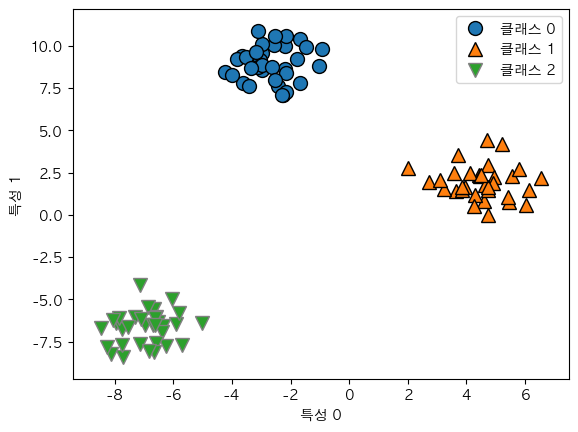

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

각 클래스의 테이터는 정규분포(가우시안 분포)를 따릅니다.

이 데이터셋으로 LinearSVC 분류기를 훈련해보겠습니다.

In [9]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


coef_ 배열의 크기는 (3,2)입니다. coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값(이 데이터셋에서는 두 개)을 가지고 있습니다.
intercept_는 각 클래스의 절편을 담은 1차원 벡터입니다.

세 개의 이진 분류기가 만드는 경계를 시각화 해보곘습니다.

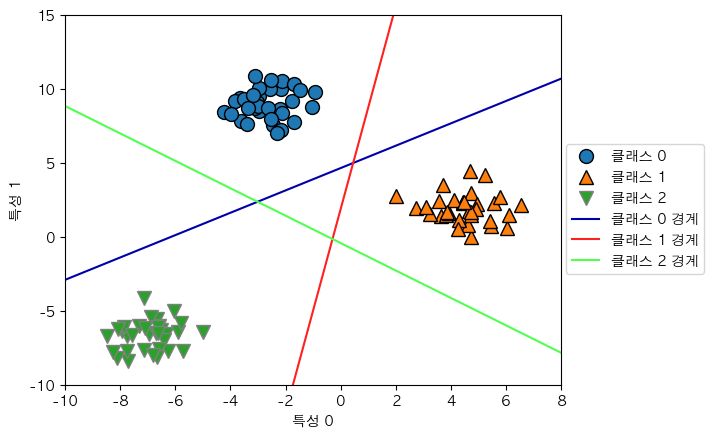

In [11]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0]+ intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계",
            "클래스 2 경계"], loc=(1.01, 0.3))

중간의 삼각형 영역은 세 분류기가 모두 나머지로 분류했습니다. 만약 이 곳의 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스로 분류 됩니다. 즉 가장 가까운 직선의 클래스가 될 것입니다.

Text(0, 0.5, '특성 1')

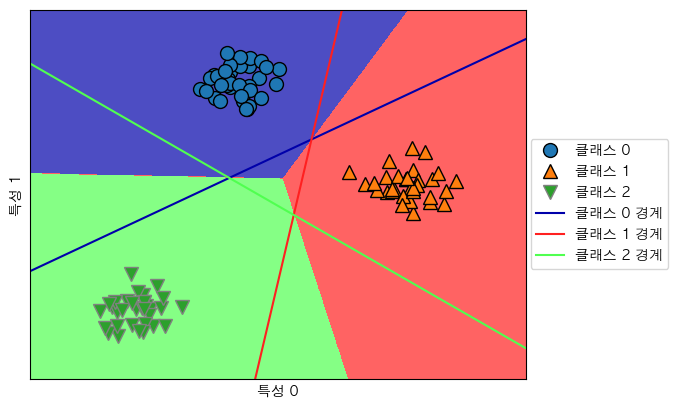

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계",
            "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

선형 모델의 주요 매게 변수는 회귀 모델에서는 alpha였고 LinearSCV와 LogisticRegression에서는 C입니다. alpha값이 클수록, C 값이 작을수록 모델이 단순해집니다. 

선형 모델은 학습 속도가 빠르고 예측도 빠릅니다. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동합니다. 

선형 모델은 샘플에 비해 특성이 많을 떄 잘 작동합니다. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에서도 선형 모델을 많이 사용합니다. 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋습니다. 

- "선형 모델은 샘플에 비해 특성이 많을 때 잘 작동합니다."

    → 데이터 포인트(샘플) 수보다 변수(특성)의 수가 많을 때, 선형 모델이 효과적으로 작동할 수 있다는 뜻입니다. 예를 들어, 특성이 수천 개인 텍스트 데이터(단어 빈도 등)를 다룰 때 선형 모델이 강력한 성능을 발휘할 수 있습니다.


- "다른 모델로 학습하기 어려운 매우 큰 데이터셋에서도 선형 모델을 많이 사용합니다."

    → 데이터의 크기(특히 특성의 수)가 너무 커서 복잡한 모델을 적용하기 어려울 때, 계산 효율성이 좋은 선형 모델이 많이 사용된다는 뜻입니다.


- "저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋습니다."

    → 특성의 수가 적은(저차원) 데이터에서는 비선형 관계를 잘 포착하는 복잡한 모델(예: 결정 트리, 랜덤 포레스트, 신경망 등)이 더 나은 예측 성능을 보일 수 있다는 의미입니다.

여기서 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier와 SDGRegressor를 사용할 수 있습니다.

SGDClissifier와 SGDRegressor는 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 다양한 선형 모델을 훈련합니다. 

확루ㅠㄹ적 경상 하강법의 학습률은 learning_rate 매개변수로 지정합니다. 기본값은 'optimal'로 반복횟수에 따라 비례적으로 감소합니다. 'adaptive'는 eta0에 지정한 값에서 시작하여 조기 종료 조건이 될 때마다 5배씩 줄이며 학습률이 1e-6보다 작아지면 알고리즘을 종료합니다.

확률적 경사하강법의 장점은 대용량 데이터에 사용할 수 있고 속도라 빠르다는 것입니다. 단점으로는 튜닝할 하이퍼 파라미터가 많옥 특성 스케일에 민감합니다.

SGDClassifier는 n_jobs 매개변수에 OVA(one versus all) 다중 분류를 병렬화하기 위해 사용핡 CPU 코어 개수를 지정할 수 있습니다. 앞서 사용했던 간단한 다중 분류 데이터셋에 SGDClassifier를 훈련해 보겠습니다.

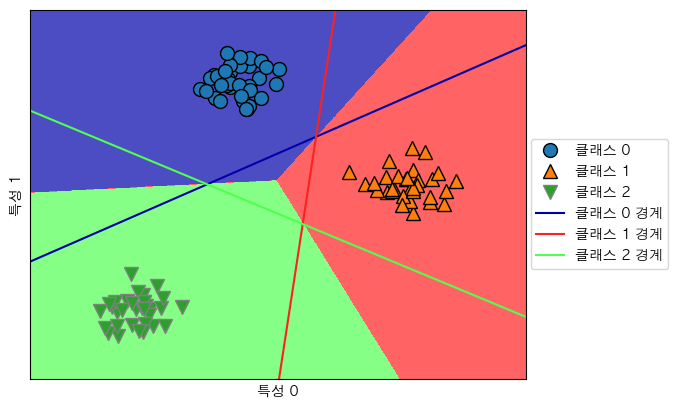

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive',
            eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계",
            "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()